In [60]:
#Importing the required modules
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns



In [61]:
!pip install ts2vg

In [62]:
!pip install igraph

In [63]:
!pip install pycairo
!pip install cairocffi

  Using cached pycairo-1.21.0.tar.gz (340 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
!pip install tabulate

In [66]:
#creating path to the folder
folder_path = r'/content/drive/MyDrive/FDA/PROJECT-2'
os.chdir(folder_path)
folders=os.listdir()

In [67]:
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
from tabulate import tabulate

In [68]:
#Output data frame format
column = ['Method','Subject','Accelerometer axis','Average degree','Network diameter','Average path length','Activity','Position']
df_task1 = pd.DataFrame(columns=column)

In [69]:
def NVG_HVG(method):
        
    if method == 'HVG':
        for i in ax:
            g = HorizontalVG()
            g.build(temp_df[i])
            ig_g = g.as_igraph()
            
            # Calculating average degree,network diameter, Average path length
            avg_degree = np.mean(ig_g.degree())
            network_dm = ig_g.diameter()
            avg_path_length = ig_g.average_path_length()

            degree.append(avg_degree)
            diameter.append(network_dm)
            length.append(avg_path_length)
            axis.append(i)
            methods.append(method)
            
    elif method== 'NVG':
        for i in ax:
            g = NaturalVG()
            g.build(temp_df[i])
            ig_g = g.as_igraph()
            
            #Calculating average degree,network diameter, Average path length
            avg_degree = np.mean(ig_g.degree())
            network_dm = ig_g.diameter()
            avg_path_length = ig_g.average_path_length()

            degree.append(avg_degree)
            diameter.append(network_dm)
            length.append(avg_path_length)
            axis.append(i)
            methods.append(method)

In [70]:
# creating list to append the calculated values
degree = []
diameter = []
length = []
axis = []
methods=[]
Subject=[]
Activity=[]
Position=[]

In [71]:
from itertools import repeat
for folder in folders:
    files=[]
    for file in os.listdir(folder):
        files.append(file)
        
    for file in files:
        df = pd.read_csv(folder_path+'//'+folder+'//'+str(file))

        ax = df.columns[2:]
        #Calculating the length of the file by using split 
        file_length = len(file.split("_"))

        if file_length > 4:           
            for i in repeat(None, 6):
                
                Subject.append(re.split(r"_",file)[-2].split('.')[0]) # using regex to find the subject
                Activity.append(re.split(r"_",file)[1]) #using regex to find activity
                Position.append(re.split(r"_",file)[2]) #using regex to find position    
        else:               
           for i in repeat(None, 6):
                
                Subject.append(re.split(r"_",file)[-1].split('.')[0])
                Activity.append(re.split(r"_",file)[1])
                Position.append(re.split(r"_",file)[2])
                 

        
        
        

        temp_df = df[1000:2024] # creating temporary df

        methods_list = ['NVG','HVG'] #passing list for horizontal and vertical vg
        for method in methods_list:
            NVG_HVG(method)




In [72]:
#converting the list data into columns in dataframe task1
df_task1['Method'] = methods
df_task1['Subject']=Subject
df_task1['Accelerometer axis'] = axis
df_task1['Average degree']= degree
df_task1['Network diameter'] = diameter
df_task1['Average path length'] = length
df_task1['Activity'] = Activity
df_task1['Position'] = Position

In [73]:
print(tabulate(df_task1, headers = df_task1.columns, tablefmt = 'pretty', showindex=False))

+--------+---------+--------------------+----------------+------------------+---------------------+--------------+----------+
| Method | Subject | Accelerometer axis | Average degree | Network diameter | Average path length |   Activity   | Position |
+--------+---------+--------------------+----------------+------------------+---------------------+--------------+----------+
|  NVG   |    1    |       attr_x       |  10.01953125   |        13        |  5.308570839442815  | climbingdown |   head   |
|  NVG   |    1    |       attr_y       |  13.814453125  |        10        |  4.723845689760508  | climbingdown |   head   |
|  NVG   |    1    |       attr_z       |  12.64453125   |        10        |  4.611320488147605  | climbingdown |   head   |
|  HVG   |    1    |       attr_x       |  3.923828125   |        38        | 13.302396444281525  | climbingdown |   head   |
|  HVG   |    1    |       attr_y       |   3.94921875   |        25        | 10.861814974340176  | climbingdown |   h

## Scatter plot

In [74]:
#Plot for x accelerometer axis
walk_run = df_task1[(df_task1['Activity']=='running') | (df_task1['Activity']=='walking')]

In [75]:
walk_run_attr_x= walk_run[walk_run['Accelerometer axis']=='attr_x']

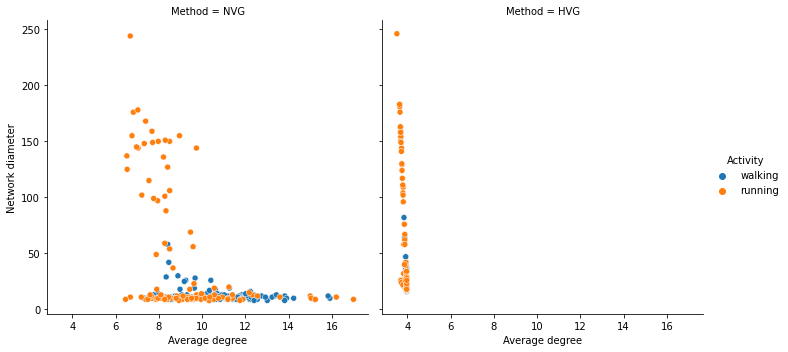

In [76]:
sns.relplot(data=walk_run_attr_x,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

In [77]:
#Plot for y accelerometer axis
walk_run_attr_y= walk_run[walk_run['Accelerometer axis']=='attr_y']

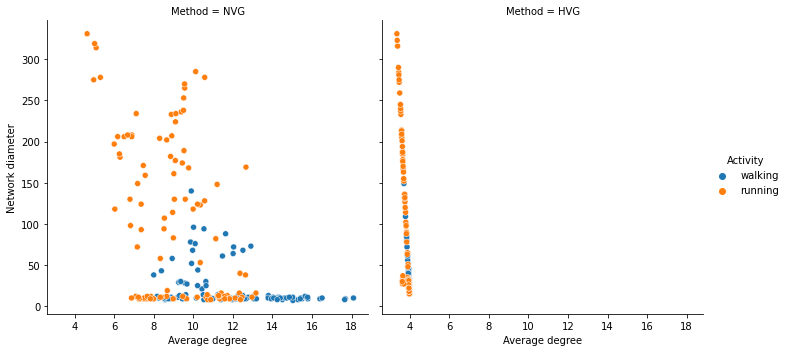

In [78]:
sns.relplot(data=walk_run_attr_y,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

In [79]:
#Plot for y accelerometer axis
walk_run_attr_z= walk_run[walk_run['Accelerometer axis']=='attr_z']

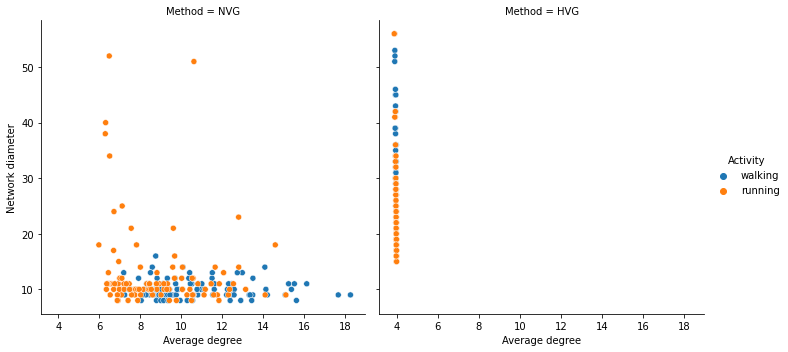

In [80]:
sns.relplot(data=walk_run_attr_z,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

In [81]:
# Climbing_up and Climbing_down
climbing_up_down = df_task1[(df_task1['Activity']=='climbingup') | (df_task1['Activity']=='climbingdown')]

In [82]:
#Plot for climbing up and climbing_down X accelerometer axis
climbing_up_down_attr_x= climbing_up_down[climbing_up_down['Accelerometer axis']=='attr_x']

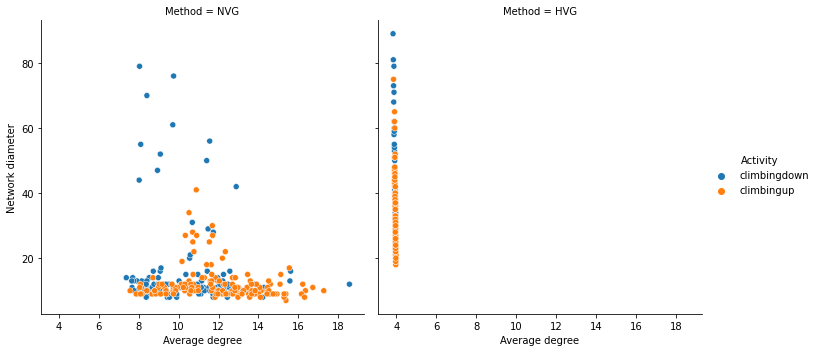

In [83]:
sns.relplot(data=climbing_up_down_attr_x,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

In [84]:
#Plot for y accelerometer axis
climbing_up_down_attr_y= climbing_up_down[climbing_up_down['Accelerometer axis']=='attr_y']

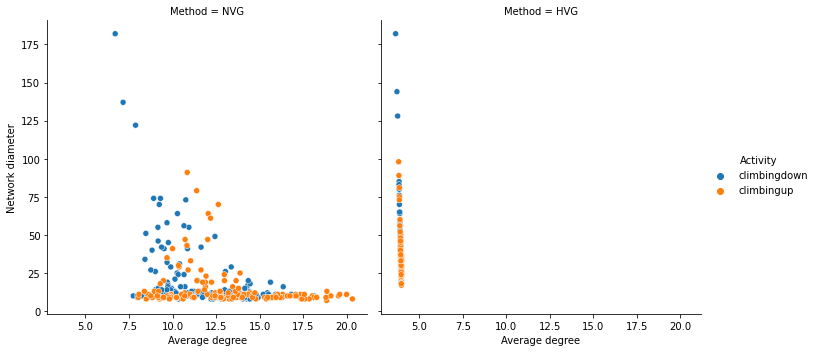

In [85]:
sns.relplot(data=climbing_up_down_attr_y,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

In [86]:
#Plot for z accelerometer axis
climbing_up_down_attr_z= climbing_up_down[climbing_up_down['Accelerometer axis']=='attr_z']

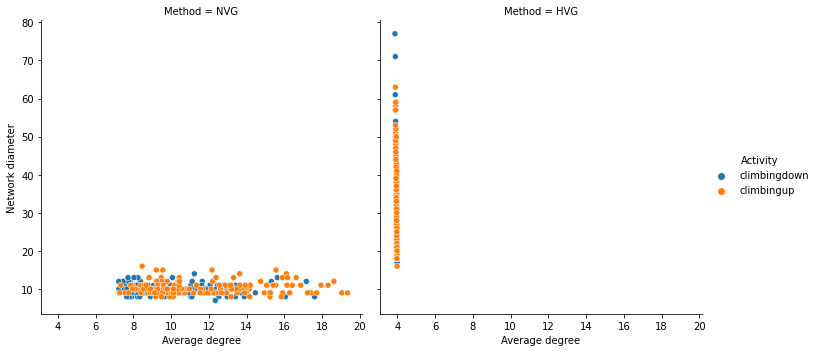

In [87]:
sns.relplot(data=climbing_up_down_attr_z,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()